# Análise de Acidentes de Trânsito em Belo Horizonte
## Introdução
Belo Horizonte, a capital de Minas Gerais, enfrenta diariamente os desafios de uma metrópole em crescimento. Entre eles, a segurança no trânsito é uma preocupação recorrente, impactando diretamente a qualidade de vida dos cidadãos. Este notebook apresenta uma análise detalhada dos acidentes de trânsito na cidade, com o objetivo de identificar padrões, locais críticos e possíveis tendências que possam orientar medidas de prevenção e melhoria.

Utilizando dados reais de acidentes registrados ao longo dos anos, foram explorados aspectos como a distribuição geográfica dos incidentes, os bairros mais afetados e os fatores predominantes que contribuíram para esses eventos. Por meio de visualizações claras e interpretações baseadas em estatísticas, este estudo busca trazer insights que possam ser úteis para gestores públicos, planejadores urbanos e a comunidade como um todo.

## Objetivos do Notebook
- Explorar os dados de acidentes de trânsito registrados em Belo Horizonte.
- Identificar padrões temporais e espaciais nos dados.
- Visualizar de forma clara e informativa os dados relevantes.
- Propor insights e direcionamentos com base na análise.

### **1. Importação das principais bibliotecas**

In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

- **Glob:** Importante para iteração e localização de arquivos com padrões específicos, sendo fundamental para auxiliar na abertura dos arquivos.

- **Pandas:** Principal biblioteca para organização, manipulação e interação com o conjunto de dados, principalmente com os DataFrames.

- **Numpy:** Fornece suporte para cálculos matemáticos, operações vetorizadas, criação de arrays e manipulação de grandes volumes de dados numéricos.

- **Matplotlib:** Essencial na visualização gráfica atraves de plots e gráficos do dataset.

### **2. Abertura e inspeção do conjunto de dados**

Ulitlizando ferramentas da biblioteca glob, conseguimos indentificar os arquivos necessários e abrir com recursos de iteração os mesmos. Logo após, ultilizamos Pandas para definir o nosso DataFrame

In [2]:
dataframes = []

for f in glob.glob('*.csv'):
    aux = pd.read_csv(f, sep=';')
    dataframes.append(aux)        

df = pd.concat(dataframes, ignore_index=True)


In [3]:
df

,numero_boletim,data hora_boletim,data_inclusao,tipo_acidente,desc_tipo_acidente,cod_tempo,desc_tempo,cod_pavimento,pavimento,cod_regional,...,valor_ups,descricao_ups,data_alteracao_smsa,valor_ups_antiga,descricao_ups_antiga,ano,mes,lat,lon,bairro
0,596171,09/01/2016 01:39,14/06/2016 00:00,H04000,QUEDA DE PESSOA DE VEICULO ...,0,NAO INFORMADO,0,NAO INFORMADO,21,...,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO,2016,1,-43.931635,-19.905752,Graça
1,618762,09/01/2016 14:15,20/06/2016 00:00,H01002,ABALROAMENTO COM VITIMA ...,0,NAO INFORMADO,0,NAO INFORMADO,21,...,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO,2016,1,-43.960682,-19.882689,Nova Cachoeirinha
2,748480,11/01/2016 12:53,18/10/2016 00:00,H04000,QUEDA DE PESSOA DE VEICULO ...,0,NAO INFORMADO,0,NAO INFORMADO,19,...,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO,2016,1,-43.941838,-19.917458,Centro
3,779230,08/01/2016 18:40,20/06/2016 00:00,H01002,ABALROAMENTO COM VITIMA ...,0,NAO INFORMADO,0,NAO INFORMADO,22,...,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO,2016,1,-43.971828,-19.926938,Calafate
4,822146,11/01/2016 01:30,20/06/2016 00:00,H09002,COLISAO DE VEICULOS COM VITIMA ...,0,NAO INFORMADO,0,NAO INFORMADO,19,...,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO,2016,1,-43.925943,-19.926579,Funcionários
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75614,2022-054269981-001,12/12/2022 17:46,12/12/2022 18:02,H09002,COLISAO DE VEICULOS COM VITIMA ...,0,NAO INFORMADO,0,NAO INFORMADO,18,...,0,NÃO INFORMADO,00/00/0000,0,NÃO INFORMADO,2022,12,-43.995179,-19.989084,Bonsucesso
75615,2022-054271937-001,05/08/2022 14:33,12/12/2022 18:12,H01002,ABALROAMENTO COM VITIMA ...,0,NAO INFORMADO,0,NAO INFORMADO,23,...,0,NÃO INFORMADO,00/00/0000,0,NÃO INFORMADO,2022,8,-43.934134,-19.851414,Minaslândia (P Maio)
75616,2022-054276901-001,12/12/2022 18:40,12/12/2022 18:40,H09002,COLISAO DE VEICULOS COM VITIMA ...,1,BOM,1,ASFALTO,22,...,0,NÃO INFORMADO,00/00/0000,0,NÃO INFORMADO,2022,12,-43.987525,-19.978041,Bonsucesso
75617,2022-054277884-001,12/12/2022 18:30,12/12/2022 18:47,H01002,ABALROAMENTO COM VITIMA ...,1,BOM,1,ASFALTO,26,...,0,NÃO INFORMADO,00/00/0000,0,NÃO INFORMADO,2022,12,-43.959215,-19.812434,Venda Nova


### **3. Limpeza e Preparação**

Em um primeiro momento, vamos ultilizar `to_datetime` da biblioteca `Pandas` para padronizar a coluna com as datas/horários no formato desejado.  

In [4]:
data_correta = pd.to_datetime(
    df['data hora_boletim'],
    format="%d/%m/%Y %H:%M",
)


In [5]:
df = df.assign(
    data_boletim = data_correta
)


Ademais, vamos remover colunas não necessárias para a análise.

In [6]:
df = df.drop(
    columns=['data hora_boletim',
             'data_inclusao',
             'valor_ups',
             'valor_ups_antiga',
             'data_alteracao_smsa',
             'descricao_ups_antiga']
).sort_values(by='data_boletim').set_index('data_boletim')


Após esse preparatórios, vamos ver como está o DataFrame:

In [7]:
df

,numero_boletim,tipo_acidente,desc_tipo_acidente,cod_tempo,desc_tempo,cod_pavimento,pavimento,cod_regional,desc_regional,origem_boletim,...,coordenada_x,coordenada_y,hora_informada,indicador_fatalidade,descricao_ups,ano,mes,lat,lon,bairro
data_boletim,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:30:00,2016-008685542-001,H04000,QUEDA DE PESSOA DE VEICULO ...,0,NAO INFORMADO,0,NAO INFORMADO,21,NORDESTE,POLICIA CIVIL,...,610820.43,7801707.67,SIM,NÃO,NÃO INFORMADO,2016,1,-43.941446,-19.877669,Parque São João Batista
2016-01-01 01:00:00,2016-001865528-001,H06002,ATROPELAMENTO DE PESSOA SEM VITIMA FATAL ...,0,NAO INFORMADO,0,NAO INFORMADO,20,LESTE,POLICIA CIVIL,...,616043.53,7799563.76,SIM,NÃO,NÃO INFORMADO,2016,1,-43.891427,-19.896736,Casa Branca
2016-01-01 01:30:00,2016-014489036-001,H01002,ABALROAMENTO COM VITIMA ...,0,NAO INFORMADO,0,NAO INFORMADO,23,NORTE,POLICIA CIVIL,...,610686.91,7805465.91,SIM,NÃO,NÃO INFORMADO,2016,1,-43.942946,-19.843720,Padre Júlio Maria
2016-01-01 02:55:00,2016-000009920-001,H01002,ABALROAMENTO COM VITIMA ...,0,NAO INFORMADO,0,NAO INFORMADO,23,NORTE,POLICIA MILITAR,...,610958.28,7806566.34,SIM,NÃO,NÃO INFORMADO,2016,1,-43.940421,-19.833761,Santa Isabel
2016-01-01 03:00:00,2016-000207284-001,H09002,COLISAO DE VEICULOS COM VITIMA ...,1,BOM,1,ASFALTO,19,CENTRO-SUL,POLICIA CIVIL,...,611496.74,7793765.15,SIM,NÃO,NÃO INFORMADO,2016,1,-43.934506,-19.949393,Sion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 18:08:00,2022-057273258-001,H01002,ABALROAMENTO COM VITIMA ...,1,BOM,1,ASFALTO,23,NORTE,POLICIA MILITAR,...,612239.23,7810127.89,SIM,NÃO,NÃO INFORMADO,2022,12,-43.928406,-19.801509,Conjunto Zilah Spósito
2022-12-31 20:16:00,2022-057287120-001,H09002,COLISAO DE VEICULOS COM VITIMA ...,0,NAO INFORMADO,0,NAO INFORMADO,19,CENTRO-SUL,POLICIA MILITAR,...,612986.62,7795656.61,SIM,NÃO,NÃO INFORMADO,2022,12,-43.920387,-19.932217,São Lucas
2022-12-31 20:29:00,2022-057285174-001,H09002,COLISAO DE VEICULOS COM VITIMA ...,0,NAO INFORMADO,0,NAO INFORMADO,20,LESTE,POLICIA MILITAR,...,615392.56,7798300.78,SIM,NÃO,NÃO INFORMADO,2022,12,-43.897566,-19.908186,Belém


### **4. Análise e visualização**

- A priori, vamos visualizar como a quantidade de acidentes se comporta em relação ao tempo no período de 2016 a 2022. Para isso, vamos chamar o eixo x de "ano,mês", e apontar o número de acidentes para cada um desses.

<Axes: title={'center': 'Número de acidentes por ano mês'}, xlabel='ano,mes', ylabel='Número de acidentes'>

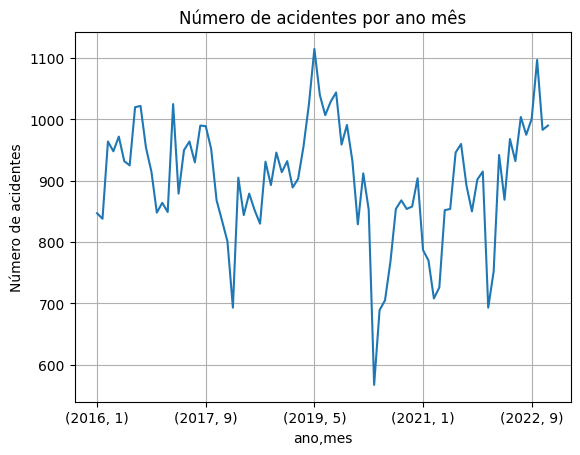

In [8]:
df_yearmonth = df.groupby(["ano","mes"]).size()
df_yearmonth.plot(kind = 'line',grid= True, title = 'Número de acidentes por ano mês',ylabel='Número de acidentes')

Observe que em meados de 2020, valor entre 2019 e 2021, existe uma baixa significativa no número de acidentes. Esse fato pode ser explicado pela Pandemia da COVID-19 a qual coincide com esse período, destacando o fato da maioria das pessoas permanecerem maior parte do tempo dentro de suas casas. Esse valor tende a subir de novo no momento do fim desse episódio.

- Ao tentarmos repitir o gráfico, porém, agora sendo apenas por ano (não mais "ano,mes"), obtemos:

<Axes: title={'center': 'Número de acidentes por ano'}, xlabel='ano', ylabel='Número de acidentes'>

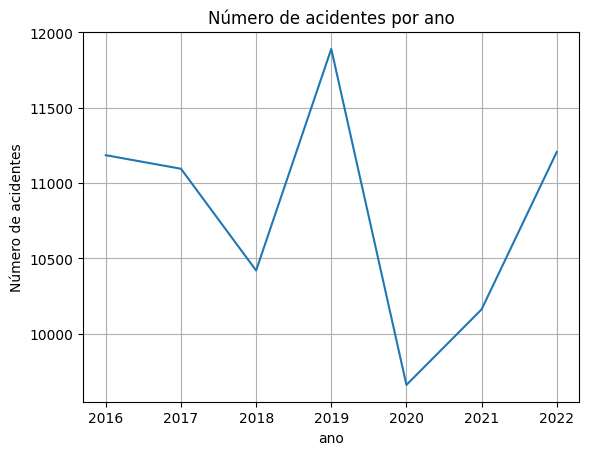

In [9]:
df_year = df.groupby(['ano']).size()
df_year.plot(kind ='line',grid = True,title = 'Número de acidentes por ano',ylabel='Número de acidentes')

Nesse novo gráfico fica nítido a discrepância quando compara-se 2020 e 2021 com os demais anos. O ano de 2019 também se encontra com uma quantidade muito maior do que os outros, contendo aproximadamente 14,5% a mais do que 2018.

- Em uma outra abordagem, veremos os tipos de acidentes mais comuns para cada determinado ano.

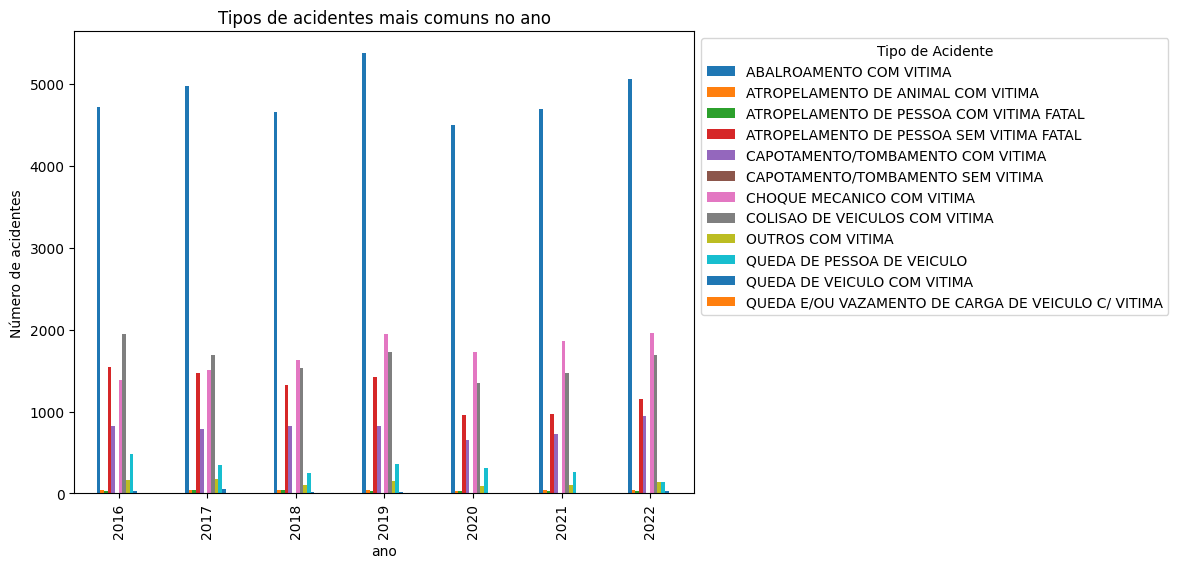

In [10]:
df_accid_year = df.groupby(['ano','desc_tipo_acidente']).size().unstack(fill_value = 0)
df_accid_year.plot(kind='bar',figsize=(8,6),title='Tipos de acidentes mais comuns no ano',ylabel='Número de acidentes').legend(bbox_to_anchor=(1, 1),title='Tipo de Acidente')

Essa nova perspectiva nos leva a observar a predominância de acidentes do tipo `"ABALROAMENTO COM VITIMA"` na cidade de Belo Horizonte. Abalroamento pode ser interpretado como um tipo de colisão entre dois veículos, e a caracterização " com vítima" indica que houve a lesão corporal em pelomenos um dos indivíduos presentes no veículo. Observa-se também `"COLISAO DE VEICULOS COM VITIMA"` e `"CHOQUE MECANICO COM VITIMA"` como um dos tipos mais frequentes de acidentes na cidade. Por mais que os termos parecem se referir a mesma coisa, a Colisão de Veículos é ampla e abrange quaisquer tipos de impacto entre objetos, obstáculos ou até pedestres, já o Choque Mecânico pode ser definido como uma batida forte e inesperada entre o transporte e uma parede, poste etc.

- Ter observado os tipos de acidentes nos leva a investigar sobre a fatalidade desses acidentes. O gráfico a seguir pode representar esse quadro

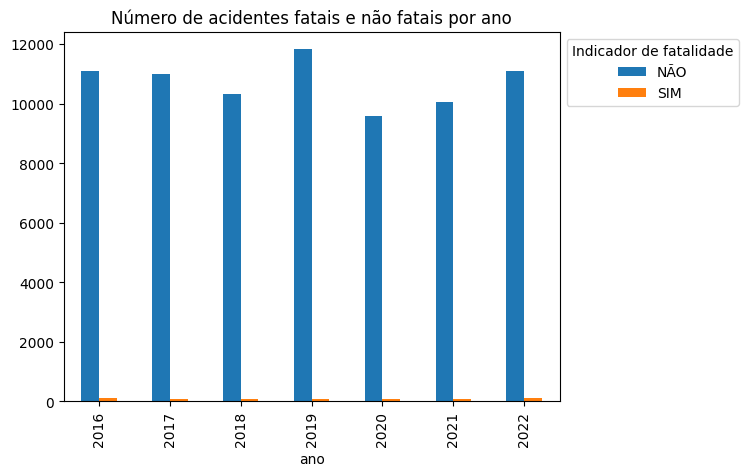

In [11]:
df_fatal = df.groupby(['ano','indicador_fatalidade']).size().unstack(fill_value = 0)
df_fatal.plot(kind = 'bar',title='Número de acidentes fatais e não fatais por ano').legend(bbox_to_anchor=(1, 1),title='Indicador de fatalidade')


Felizmente, assim como indica o plot, a maior parte dos acidentes não são graves. Portanto, através de uma visualização númerica podemos ver uma proporção desses resultados.

In [12]:
fatal_proportion = df_fatal['SIM']/(df_fatal['SIM'] + df_fatal['NÃO']) * 100 
df_fatal['INDICE_FATALIDADE em %'] = fatal_proportion
df_fatal


indicador_fatalidade,NÃO,SIM,INDICE_FATALIDADE em %
ano,,,
2016,11081,104,0.929817
2017,10997,98,0.883281
2018,10323,97,0.930902
2019,11817,73,0.613961
2020,9567,94,0.972984
2021,10067,95,0.934855
2022,11098,108,0.963769


A coluna `INDICE_FATALIDADE em %` apresenta em termos de % quanto dos acidentes registrados são fatais. Nesse caso, temos que para todos esses menos do que 1% são fatais.

- Diante essa situação, vamos tentar observar quais regiões contém maior número de acidentes fatais na capital. Novamente, vamos construir um gráfico indicando a fatalidade de cada acidentes, e representando verticalmente a quantidade desses.

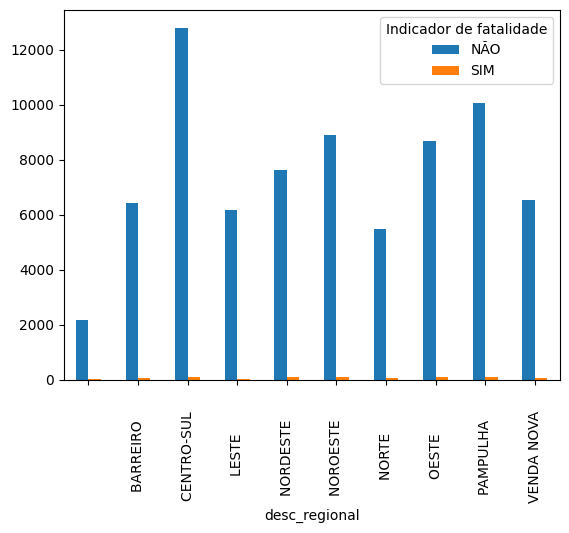

In [13]:
df_neighborhood = df.groupby(['desc_regional','indicador_fatalidade']).size().unstack(fill_value = 0)
df_neighborhood.plot(kind='bar').legend(bbox_to_anchor=(1, 1),title='Indicador de fatalidade')

Descartando a região sem nome (essas representam os acidentes que não tiveram as regiões sinalizadas), podemos observar que a maior parte dos acidentes ocorrem na região centro-sul. 

Vamos retomar a idéia anterior de visualizar esse números diretamente no DataFrame.

In [14]:
fatal_region = df_neighborhood['SIM']/(df_neighborhood['SIM'] + df_neighborhood['NÃO']) * 100 
df_neighborhood['INDICE_FATALIDADE em %'] = fatal_region
df_neighborhood

indicador_fatalidade,NÃO,SIM,INDICE_FATALIDADE em %
desc_regional,,,
,2174,22,1.001821
BARREIRO,6426,53,0.818027
CENTRO-SUL,12814,86,0.666667
LESTE,6184,36,0.578778
NORDESTE,7638,101,1.305078
NOROESTE,8921,93,1.031728
NORTE,5495,41,0.740607
OESTE,8686,78,0.890005
PAMPULHA,10081,107,1.050255


A região Nordeste se destaca como a região mais perigosa nesse sentido. Nesse lado de Belo Horizonte, temos o Anel Rodoviário no trecho próximo da cidade de Caeté, sendo um local popularmente conhecido como um trajeto perigoso pelos moradores e pelos que transitam no mesmo.

- Outra maneira de visualizar dados desse conjunto é através do plot de mapas. Para executar essa idéia, usaremos as colunas `coordenada_x` e `coordenada_y` do DataFrame, que representam uma localização geográfica precisa do acidente. Vamos fazer um gráfico para cada tipo de acidente:

In [15]:
min_lat = df.get(['lat', 'lon']).get('lat').min()
max_lat = df.get(['lat','lon']).get('lat').max()

eixo_x = np.linspace(min_lat, max_lat, 5)

Definimos as maiores e menores latitudes para a construção de um gráfico proporcional.

In [16]:
tipos_de_acidentes = np.array(df.groupby('desc_tipo_acidente').count().sort_values(by = 'indicador_fatalidade', ascending = False).reset_index().head(7).get('desc_tipo_acidente'))
tipos_de_acidentes

array(['ABALROAMENTO COM VITIMA                           ',
       'CHOQUE MECANICO COM VITIMA                        ',
       'COLISAO DE VEICULOS COM VITIMA                    ',
       'ATROPELAMENTO DE PESSOA SEM VITIMA FATAL          ',
       'CAPOTAMENTO/TOMBAMENTO COM VITIMA                 ',
       'QUEDA DE PESSOA DE VEICULO                        ',
       'OUTROS COM VITIMA                                 '], dtype=object)

Listamos os tipos mais comuns.

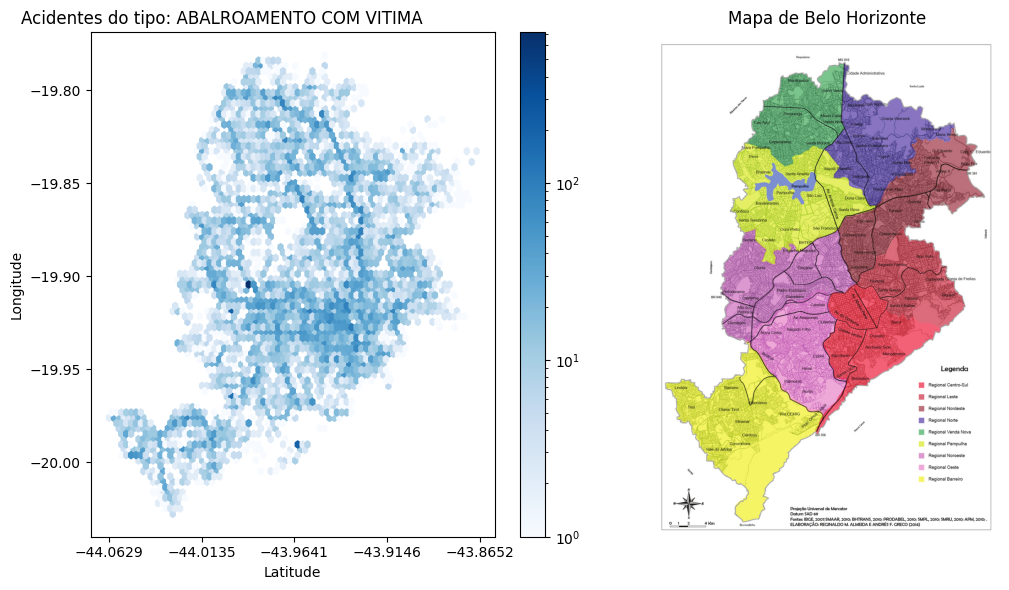

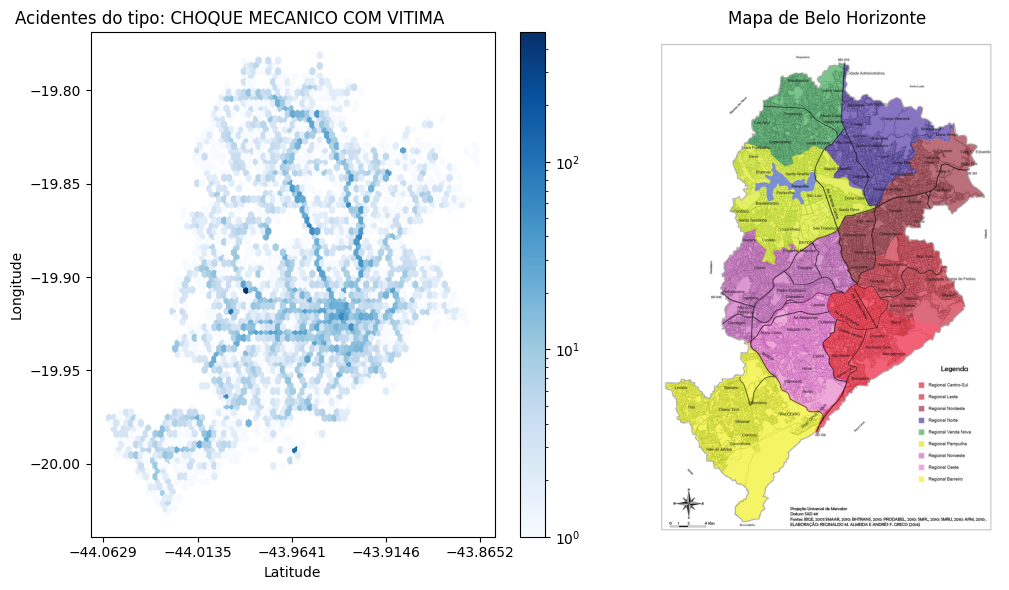

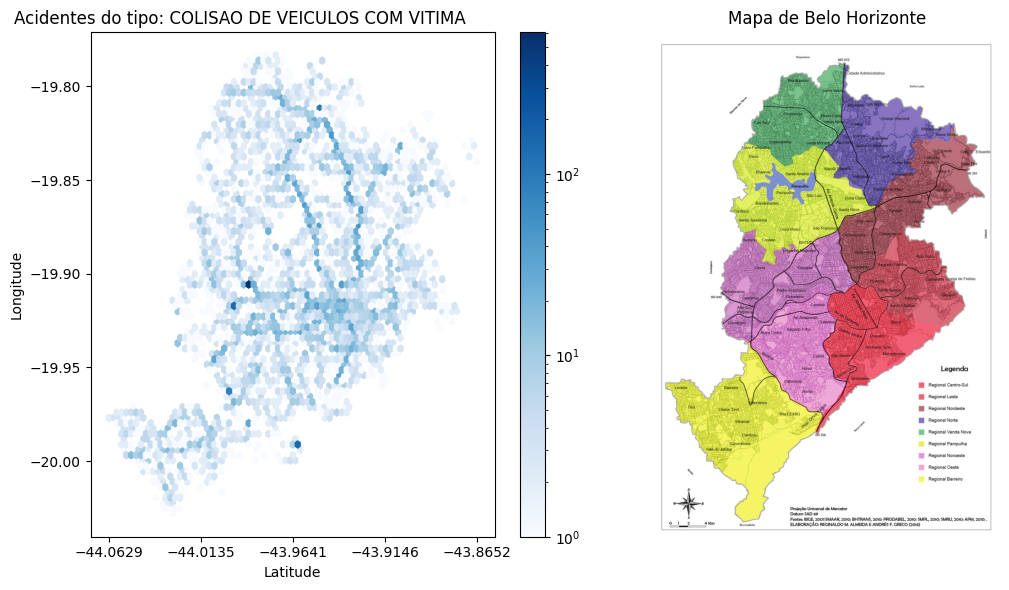

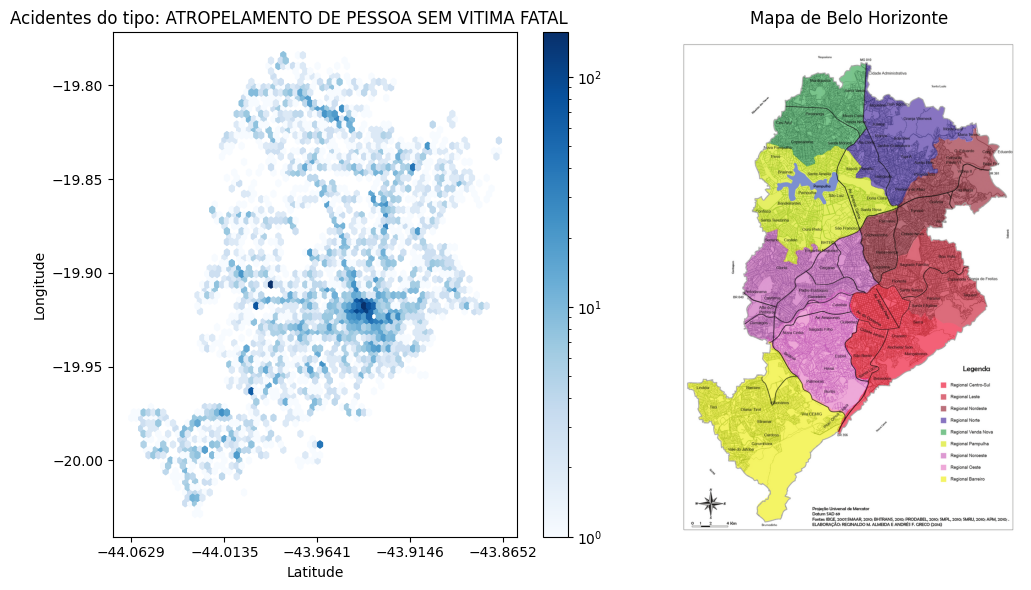

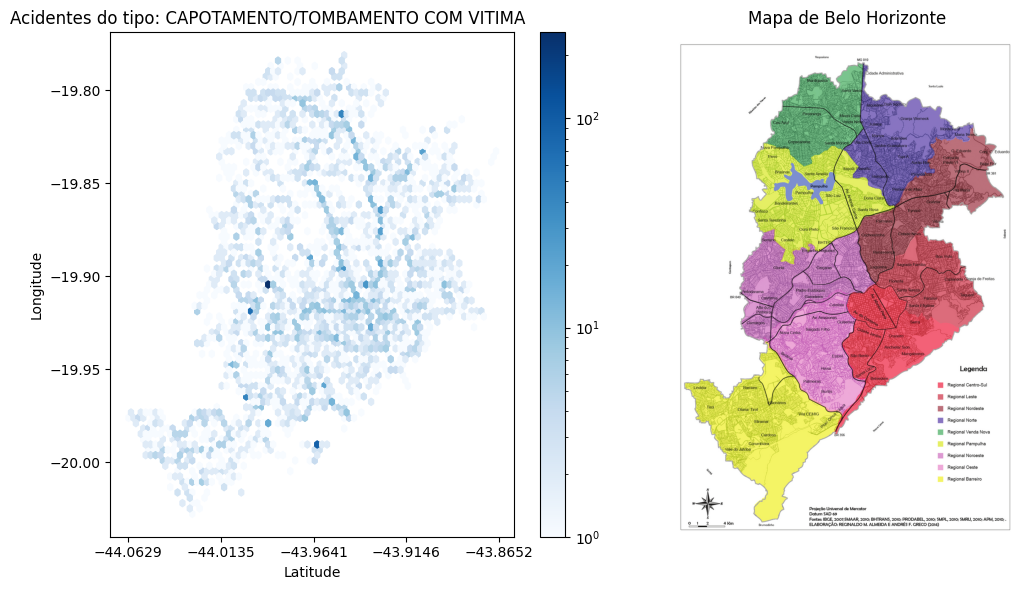

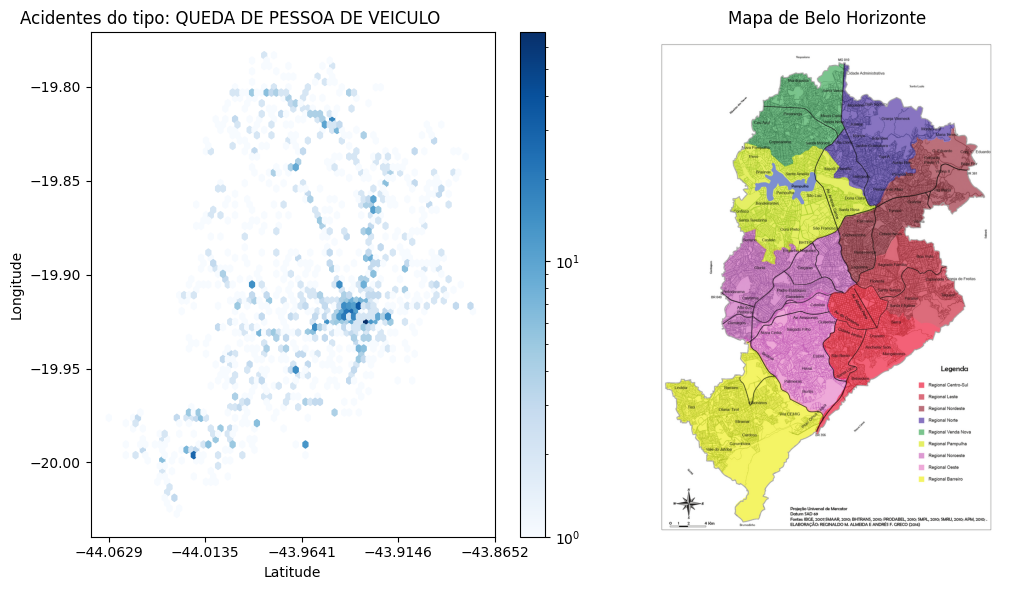

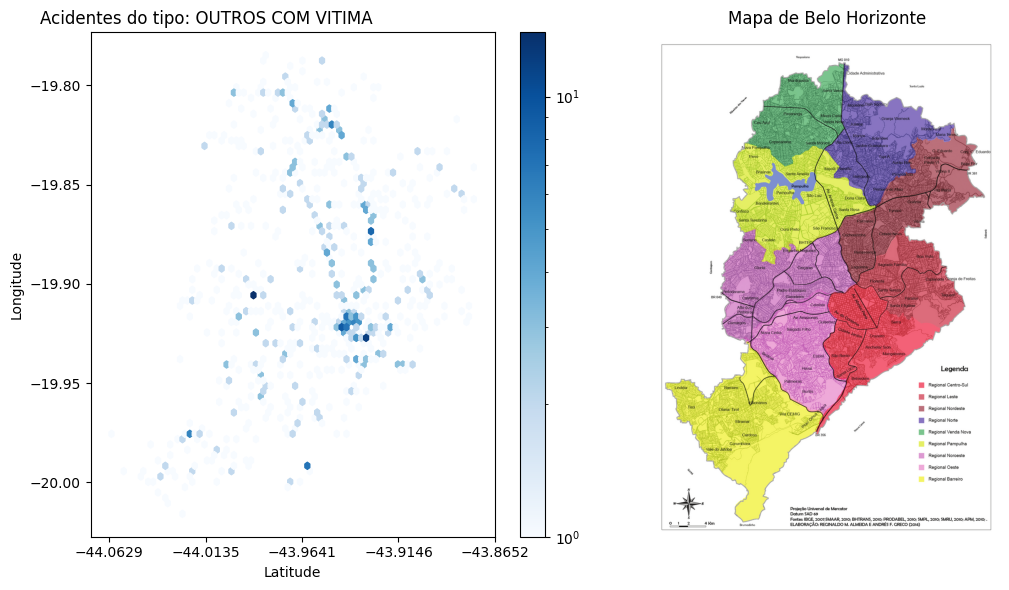

In [17]:
img = mpimg.imread("C:\\Caio\\Owl\\Progamming\\Visual Studio\\PYNB\\Acidentes de Trânsito\\dados\\FIGURA-1-Mapa-do-municipio-de-Belo-Horizonte-MG-com-as-divisoes-administrativas.png")
for tipo in tipos_de_acidentes:

    fig, ax = plt.subplots(1, 2, figsize = (11, 6))
    
    df[df['desc_tipo_acidente'] == tipo].plot(

    kind='hexbin',
    x ='lat',
    y='lon',
    mincnt=1,
    gridsize=75,
    bins='log',
    cmap = 'Blues',
    ax = ax[0]
    )
    ax[0].set_title('Acidentes do tipo: ' + tipo )
    ax[0].set_xlabel('Latitude')
    ax[0].set_ylabel('Longitude')
    ax[0].set_xticks(ticks = eixo_x)

    ax[1].imshow(img)
    ax[1].imshow(img)
    ax[1].axis('off')  # Desligar os eixos para a imagem
    ax[1].set_title('Mapa de Belo Horizonte')

    plt.tight_layout()
    plt.show()

Essa análise permite visualziar como cada tipo de acidente age para cada região. As regiões tendem a não apresentar um comportamento muito padrão, com excecção da região central quanto ao tipo `ATROPELAMENTO DE PESSOA SEM VITIMA FATAL`, que apresenta uma concentração muito alta desses sinistros de trânsitos. Uma pesquisa das coordenadas sinaliza que essa região pertence ao conjunto central próximo ao bairro Savassi. Os bairros ao redor desse são os mais movimentados da cidade, devido ao alto número de trabalhadores durante o dia, o que pode ser um indicador desse caso.

### 7. Análise Preditiva com Bootstrap e Regressão Linear

- Apartir de agora, aplicaremos a técnica de *bootstrap* para estimar a variabilidade dos nossos dados e, em seguida, utilizaremos regressão linear para realizar previsões sobre os acidentes de trânsito, com o objetivo de identificar possíveis tendências futuras. Vamos fazer o nosso *bootstrap* e definir intervalos.

In [18]:
bootstrap_mean = np.array([])
##Loop fazendo o bootstrap
for i in range(10000):
    resample = df.groupby(['ano','mes']).size().sample(84, replace=True)
    mean = resample.mean()
    bootstrap_mean = np.append(bootstrap_mean, mean)
population_mean = df.groupby(['ano','mes']).size().mean()

##Percentis de um IC de 95%

left = np.percentile(bootstrap_mean, 2.5)
right = np.percentile(bootstrap_mean, 97.5)

- Em seguida, vamos visualizar esse intervalo:

Os valores extremos correspondem a 878.5592261904762 e a 920.6907738095238


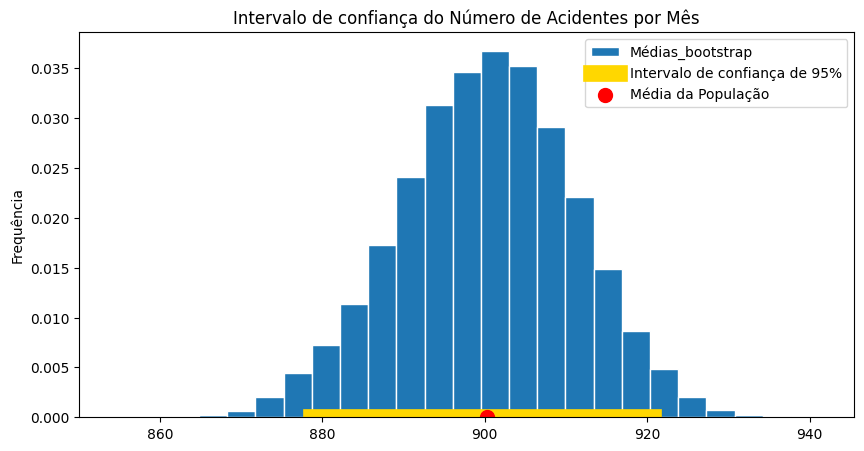

In [19]:
df_boot = pd.DataFrame().assign(Médias_bootstrap = bootstrap_mean)
df_boot.plot(kind='hist', density=True, bins=25, ec='w', figsize=(10, 5),title='Intervalo de confiança do Número de Acidentes por Mês')
plt.plot([left, right], [0, 0], color='gold', linewidth=12, label='Intervalo de confiança de 95%', zorder=2);
plt.scatter(population_mean, 0.000004, color='red', s=100, label='Média da População').set_zorder(2)
plt.legend()
plt.ylabel("Frequência");
print(f'Os valores extremos correspondem a {left} e a {right}')

Diante de uma análise via *bootstrap*, podemos concluir,com 95% de confiança, que a média populacional dos acidentes está entre 865 e 911.

- Agora vamos realizar três Gráficos de dispersão, onde o eixo X é o número de acidentes para 2019, 2020 ou 2021. Cada ponto no gráfico vai corresponder a um bairro.

In [20]:
df_regress = df.groupby(['bairro', 'ano']).size().reset_index()
dados_2019 = df_regress[df_regress.get('ano') == 2019]
dados_2020 = df_regress[df_regress.get('ano') == 2020]
dados_2021 = df_regress[df_regress.get('ano') == 2021]
dados_2022 = df_regress[df_regress.get('ano') == 2022]

In [21]:
dados_2019_2020 = dados_2019.merge(
    dados_2020,
    on='bairro'
 )
dados_2019_2021 = dados_2019.merge(
    dados_2021,
    on='bairro'
 )
dados_2019_2022 = dados_2019.merge(
    dados_2022,
    on='bairro'
 )

<Axes: title={'center': 'Número de Acidentes: 2022 X 2019'}, xlabel='Numero de acidentes em 2022', ylabel='Numero de acidentes em 2019'>

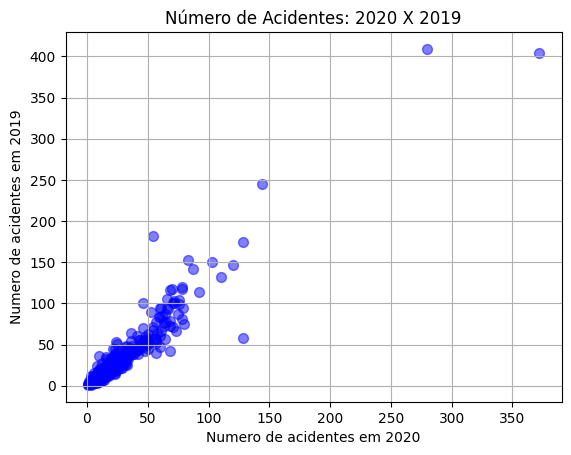

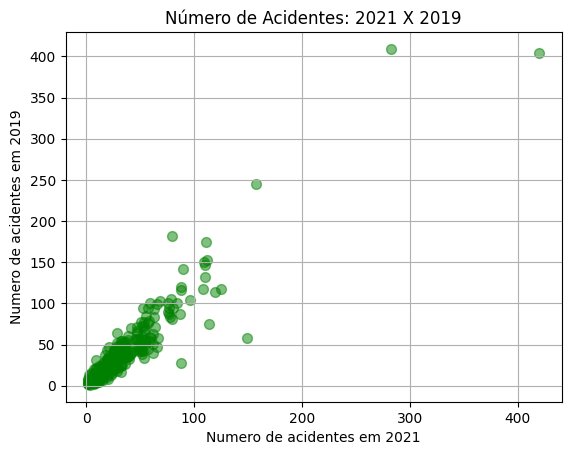

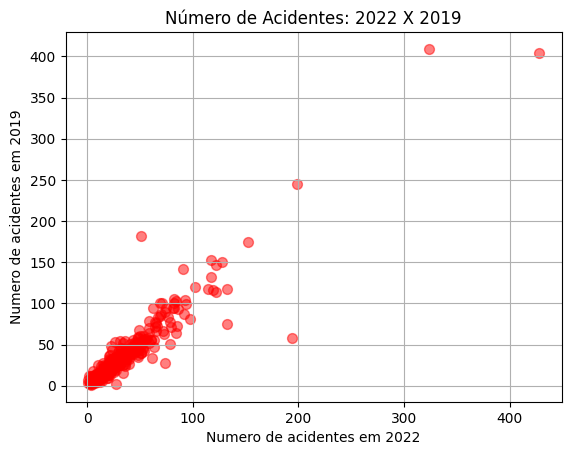

In [22]:
dados_2019_2020.plot(kind='scatter', x='0_y', y='0_x', color='blue', s=50, alpha=0.5,grid = True,title='Número de Acidentes: 2020 X 2019',
                     xlabel='Numero de acidentes em 2020',ylabel='Numero de acidentes em 2019')
dados_2019_2021.plot(kind='scatter', x='0_y', y='0_x', color='green', s=50, alpha=0.5,grid = True,title='Número de Acidentes: 2021 X 2019',
                     xlabel='Numero de acidentes em 2021',ylabel='Numero de acidentes em 2019')
dados_2019_2022.plot(kind='scatter', x='0_y', y='0_x', color='red', s=50, alpha=0.5,grid = True,title='Número de Acidentes: 2022 X 2019',
                     xlabel='Numero de acidentes em 2022',ylabel='Numero de acidentes em 2019')

Observar esses gráficos torna possível observar a correlação do número de acidentes em cada determindo ano com relação a 2022.

- Algo que é possível fazer com essa informação é tentar prever o número de acidentes de 2022 com base nos valores anteriores. Vamos fazer isso.

In [23]:
def standard_units(number):
    return (number - number.mean()) / np.std(number)
def correlation(df, x, y):
    x_std = standard_units(x)
    y_std = standard_units(y)
    return (x_std * y_std).mean()
def slope_of(df):
    '''Retorne a inclinação da linha de regressão para o DataFrame fornecido nas unidades originais.
    Assuma que a coluna duration contém os valores de x e a coluna wait contém os valores de y.
    '''
    r = correlation(df,df.get('0_y'),df.get('0_x'))
    return r * (np.std(df.get('0_x'))/np.std(df.get('0_y')))

def intercept_of(df):
    '''Retorne a inclinação da linha de regressão para o DataFrame fornecido nas unidades originais.(legal nao ter diferença desse comentário pro da ultima função)
    Assuma que a coluna duration contém os valores de x e a coluna wait contém os valores de y.
    '''
    return slope_of(df)*(-df.get('0_y').mean())+df.get('0_x').mean()
def calculator(df):
  predict = slope_of(df) * df.get('0_y') + intercept_of(df)
  return predict

In [24]:
pred_2019_2021 = calculator(dados_2019_2021)
df_pred_2019_2021 = dados_2019_2021.assign(Predict_2022 = pred_2019_2021)

dados_2020_2021 = dados_2020.merge(
    dados_2021,
    on='bairro'
 )
pred_2020_2021 = calculator(dados_2020_2021)
df_pred_2020_2021 = dados_2020_2021.assign(Predict_2022 = pred_2020_2021)

In [25]:
df_pred_2019_2021 = df_pred_2019_2021.assign(residual = (df_pred_2019_2021.get('0_x') -df_pred_2019_2021.get('Predict_2022')) )
df_pred_2020_2021 = df_pred_2020_2021.assign(residual = (df_pred_2020_2021.get('0_x') -df_pred_2020_2021.get('Predict_2022')) )

<Axes: title={'center': 'Resíduos da comparação entre 2022 e a previsão com base em 2020 X 2021'}, xlabel='Número de acidentes 2021', ylabel='residual'>

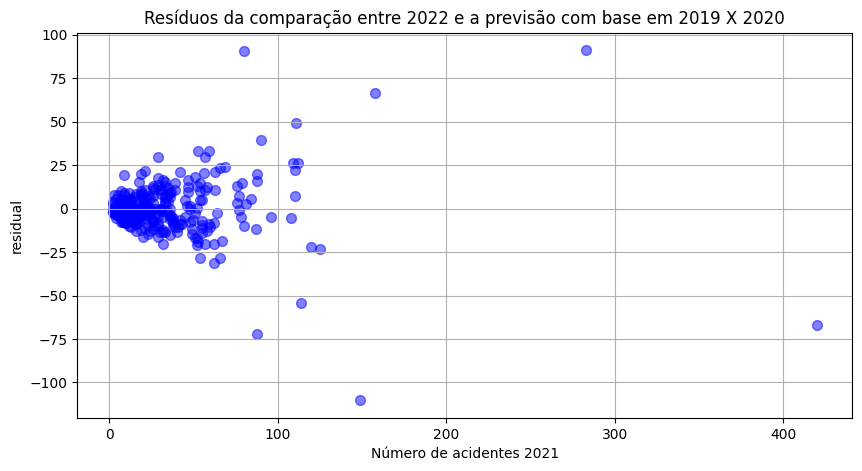

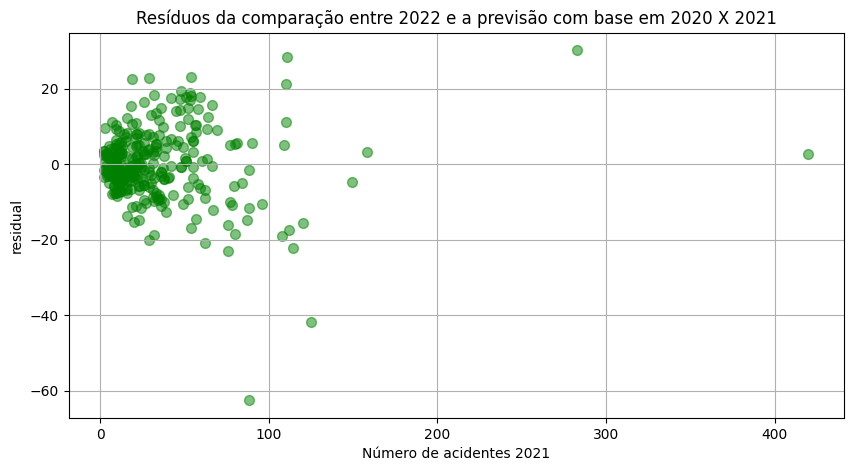

In [26]:
df_pred_2019_2021.plot(kind = 'scatter',y='residual',x ='0_y',xlabel='Número de acidentes 2021',color='blue',title='Resíduos da comparação entre 2022 e a previsão com base em 2019 X 2020',
                       s=50, alpha=0.5,grid = True,figsize=(10,5))
df_pred_2020_2021.plot(kind = 'scatter',y='residual',x ='0_y',xlabel='Número de acidentes 2021',color='green',title='Resíduos da comparação entre 2022 e a previsão com base em 2020 X 2021',
                       s=50, alpha=0.5,grid = True,figsize=(10,5))

Essas informações nos permite visualizar os chamados "resíduos" para cada previsão conhecendo o número real de acidentes. Conhecendo a diferença e observando que essa é um valor baixo, podemos agora realizar o mesmo experimento para tentr prever quantos acidentes a mais deverão ocorrer em outro ano.

- Vamos tentar prever quantos acidentes a mais ocorrerão em 2023:

In [27]:
dados_2021_2022 = dados_2021.merge(
    dados_2022,
    on='bairro'
 )
pred_2023 = calculator(dados_2021_2022)
df_pred_2023 = dados_2021_2022.assign(Predict_2023 = pred_2023,Diferença = (dados_2021_2022.get('0_y') - pred_2023))[['bairro','Predict_2023','Diferença']]
df_pred_2023.get('Diferença').sum() ##com base no modelo, quantos mais acidentes devem ocorrer em 2023


1048.0000000000007

Com base nessas informações, estima-se que pelomenos 1048 acidentes a mais (em comparação com 2022) pode ocorrer no ano de 2023.

### **8. Análises adicionais.**

- Apartir de agora vamos reaizar anáilses adicionais quanto ao nosso conjunto de dados. Vamos visualizar o quão fatal é cada acidente para cada tipo de clima:

In [28]:
df_weather_fatal = df[df['indicador_fatalidade'] == 'SIM'].groupby(['desc_tempo']).size().reset_index(name='fatal_count')
df_weather_nonfatal = df[df['indicador_fatalidade'] == 'NÃO'].groupby(['desc_tempo']).size().reset_index(name='nonfatal_count')
df_weather = pd.merge(df_weather_fatal, df_weather_nonfatal, on='desc_tempo', how='outer')

In [29]:
df_weather['fatal_prop_%'] = (df_weather['fatal_count'] / df_weather['nonfatal_count'])*100
df_weather


,desc_tempo,fatal_count,nonfatal_count,fatal_prop_%
0,BOM,445,29419,1.512628
1,CHUVA,66,3160,2.088608
2,NAO INFORMADO,140,40721,0.343803
3,NEBLINA,3,37,8.108108
4,NUBLADO,15,1613,0.929944


Observar essa tabela nos explicita que, por mais que sejam consideravelmente mais raros, os acidentes que envolvem a condição climática de neblina são os mais fatais. Logo após, podemos observar que acidentes com chuvas também tendém a apresentar um risco de fatalidade maior. Infelizmente, temos um grande conjunto de condições climáticas não informadas, o que pode dificultar o nosso estudo quanto a esse caso. 

- Uma outra anáilse que pode ser feita é tentar observar a origem dos boletins dos acidentes de trânsito.

<Axes: title={'center': 'Corpo policial responsável pelo atendimento'}, xlabel='Corpo Responsável'>

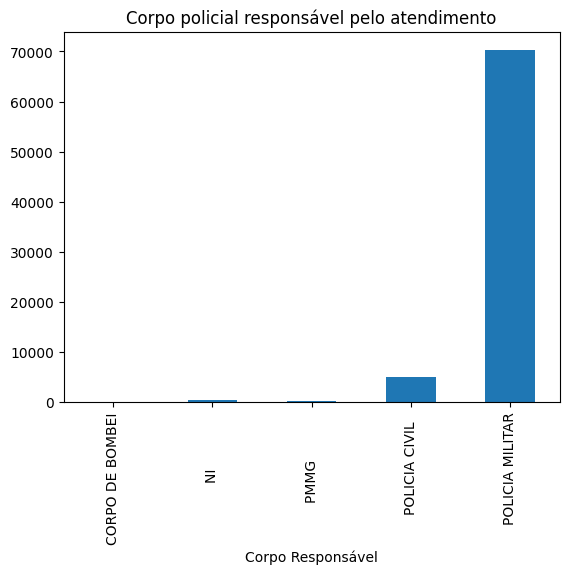

In [30]:
df_origin = df.groupby(['origem_boletim']).size()
df_origin.plot(kind ='bar',title='Corpo policial responsável pelo atendimento',xlabel='Corpo Responsável')

Analisar a origem do boletim, ou seja,a Corporação Policial responsável pelo relatório , nos leva a observar sem a necessidade de métodos para medir a proporção exata que a "Polícia Militar" é a responsável por atender a maioria dos casos de acidentes. As conclusões sobre o que esse fato pode indicar devem levar em consideração a quantidade de viaturas de cada corpo no cenário urbano, as atividades propostas para cada um desses ,etc. Esses resultados são interessantes pois podem ser ultilizados para um estudo adverso sobre essas corporações.

### **9. Conclusões e Recomendações**

Por meio da visualização de gráfico de barras, gráficos de linhas e outros extratos, conseguimos visualizar como o número de acidentes se comporta com base na região e ao decorrer do tempo. Também foi possível observar como essa distribuição se comporta em relação aos tipos de acidentes, e a fatalidade dos mesmos. Além disso, realizamos a tática do Bootstrap para observar a correlação e tentar prever a quantidade de acidentes a mais em 2023. Essas descobertas podem auxiliar na formulação de políticas públicas e estratégias preventivas mais direcionadas, como campanhas de conscientização específicas para períodos críticos ou medidas para reduzir acidentes predominantes. Ademais, foi fundamental a análise para cada região, por que assim é possível uma tomada de decisão inteligente para essas, evitando e reduzindo tragédias e menos sinistros em determinados pontos, levando a uma cidade mais segura e livre desse problema presente na vida do cidadão de BH. Vale salientar também a falta de informação em uma parte do conjunto de dados. Esse ponto fica nítido quando plotamos o gráfico de fatalidade para os casos em cada região, onde mais de 2000 não tiveram a região documentada. Essa carência pode ser prejudicial em trabalhos futuros, e deve receber atenção por parte do orgão responsável.



### **10. Referência**

- Conjuntos de Dados: https://dados.pbh.gov.br/dataset/relacao-de-ocorrencias-de-acidentes-de-transito-com-vitima
- O projeto foi feito usando como base um projeto que fiz da disciplina "Fundamento de Ciência de Dados" , da Universiade Federal de Minas Gerais.